# Todo

* Match colorbar size to graph size
* Add standard beneathdata ownership tag
* make numbers currency
* Make a second triangle graph?
* Add isopotential lines with dollar values on them

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
single = {2013: [(0.0, 0),
    (0.1, 8295),
    (0.15, 36250),
    (0.25, 87850),
    (0.28, 183250),
    (0.33, 398350),
    (0.35, 400000),
    (0.396, 1000000000),
    ],
    2014: [(0.0, 0),
    (0.1, 9075),
    (0.15, 36900),
    (0.25, 89350),
    (0.28, 186350),
    (0.33, 405100),
    (0.35, 406750),
    (0.396, 1000000000),
    ],
    2017: [(0.0, 0),
    (0.1, 9325),
    (0.15, 37950),
    (0.25, 91900),
    (0.28, 191650),
    (0.33, 416700),
    (0.35, 418400),
    (0.396, 1000000000),
    ]
    }
standard_deduction = {2013:6100, 2014:6200, 2017:6350}
personal_ex = {2013:3900, 2014:3950, 2017:4050}

married = {2013: [(0.0, 0),
    (0.1, 17850), 
    (0.15, 72500), 
    (0.25, 146400), 
    (0.28, 223050), 
    (0.33, 398350),
    (0.35, 400000),
    (0.396, 1000000000),
    ],
    2014:[(0.0, 0),
    (0.1, 18150), 
    (0.15, 73800), 
    (0.25, 148850), 
    (0.28, 226850), 
    (0.33, 405100),
    (0.35, 457600),
    (0.396, 1000000000),
    ],
    2017: [(0.0, 0),
    (0.1, 18650),
    (0.15, 75900),
    (0.25, 153100),
    (0.28, 233350),
    (0.33, 416700),
    (0.35, 470700),
    (0.396, 1000000000),
    ]
}

def marginal_tax(income, cutoffs):
    taxes = 0
    rmd = income
    for i in range(1, len(cutoffs)):
        rate, cutoff = cutoffs[i]
        prev_cutoff = cutoffs[i-1][1]
        if rmd <= cutoff-prev_cutoff:
            taxes += rmd*rate
            break
            
        taxes += (cutoff - prev_cutoff)*rate
        rmd = rmd - (cutoff - prev_cutoff)

    return taxes 

def income_tax(income, joint=False, deduction=None, year=2017):
    
    if deduction is None and joint is False:
        deduction = standard_deduction[year] + personal_ex[year]
    elif deduction is None and joint is True:
        deduction = (standard_deduction[year] + personal_ex[year])*2
    
    if joint:
        tax = marginal_tax(income-deduction, married[year])
    else:
        tax = marginal_tax(income-deduction, single[year])
    
    return tax

def income_and_fica(income, joint=False, deduction=None, year=2017):
    tax = income_tax(income, joint, deduction, year)
    tax += 0.0765*income
    return tax


In [4]:
a = income_tax(100000, True)
b = income_tax(100000, False)
print(a)
print(b)
print(b - a)

11277.5
18138.75
6861.25


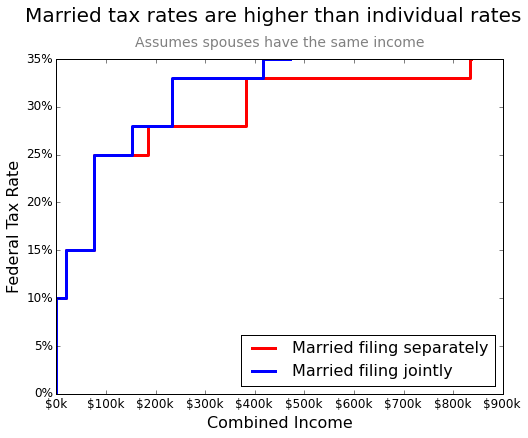

In [5]:
from matplotlib.ticker import FuncFormatter

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
endel = 1
ax.step([elem[1]*2 for elem in single[2017][:-endel]], [elem[0] for elem in single[2017][:-endel]], 'r',
        label='Married filing separately', linewidth=3)
ax.step([elem[1] for elem in married[2017][:-endel]], [elem[0] for elem in married[2017][:-endel]], 'b',
       label='Married filing jointly', linewidth=3) 
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: '$' + str(int(x/1000)) + 'k'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: str(int(x*100)) + '%'))
# ax.set_xlim([0, single[2017][-endel-1][1]])
ax.tick_params(labelsize=12)

ax.set_title("Assumes spouses have the same income", fontdict={'size':14, 'color': 'gray'}, y=1.02)
plt.suptitle("Married tax rates are higher than individual rates", fontdict={'size':20}, y=1.02)
ax.set_xlabel('Combined Income', fontsize=16)
ax.set_ylabel('Federal Tax Rate', fontsize=16)
ax.legend(loc='lower right', fontsize=16)

In [6]:
single[2017][endel]

(0.1, 9325)

/home/tyleha/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


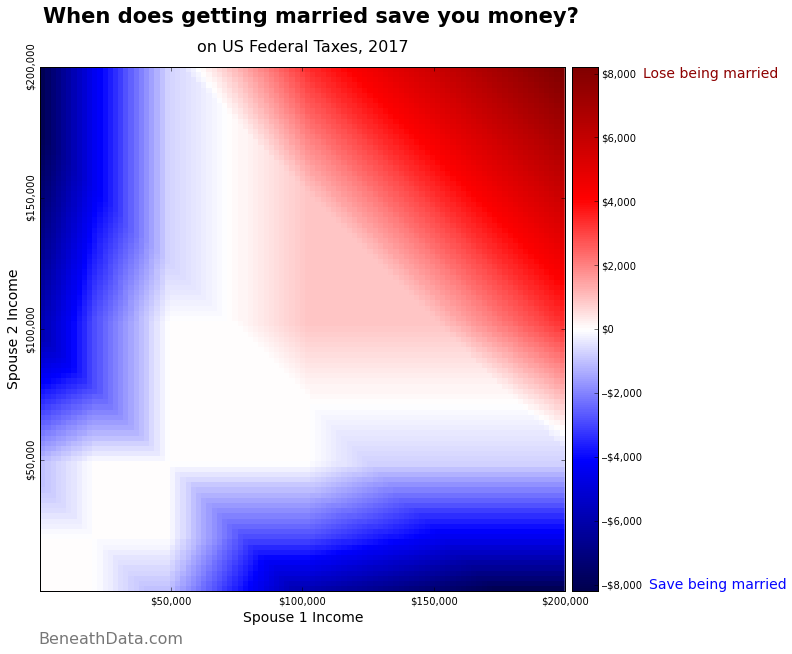

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as tkr
from matplotlib import cm

incomes = np.array(range(0, 201, 2))*1000 
grid = np.zeros([len(incomes)]*2)
for i in range(len(incomes)):
    for j in range(len(incomes)):
        inci, incj = incomes[i], incomes[j]
        taxi = income_tax(inci, False)
        taxj = income_tax(incj, False)
        taxtot = income_tax(inci+incj, True)
        #raw dollar sum 
        grid[len(incomes)-i-1,j] = taxtot - taxi - taxj
        #grid[len(incomes)-i-1,j] = ((taxi+taxj)/(inci + incj) - taxtot/(inci+incj))*100


extent = [incomes[0], incomes[-1], incomes[0], incomes[-1]]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cmap_range = np.max([np.nanmax(grid), np.abs(np.nanmin(grid))])
col = ax.imshow(grid, extent=extent, cmap=cm.seismic, interpolation='none', vmin=-cmap_range, vmax=cmap_range)
# plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.yticks(rotation=90)


ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
ax.set_yticks([50000, 100000, 150000, 200000])
ax.set_xticks([50000, 100000, 150000, 200000])

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(col, cax=cax, format=tkr.FuncFormatter(lambda x, p: '$' + format(int(x), ',') if x >= 0 else '–$' + format(abs(int(x)), ',')))

ax.set_xlabel('Spouse 1 Income', fontsize=14)
ax.set_ylabel('Spouse 2 Income', fontsize=14)
# cax.text(0, -0.06, "Spouse 1 Income", color='#000000', fontsize=14, ha='left', transform=ax.transAxes)
# cax.text(-0.06, 0.2, "Spouse 2 Income", color='#000000', fontsize=14, ha='left', rotation='vertical', transform=ax.transAxes)

ax.set_title("on US Federal Taxes, 2017", fontdict={'size':16}, y=1.02)
fig.suptitle('When does getting married save you money?', fontdict={'size':21, 'fontweight':'bold'}, y=0.96)

ax.text(0, -0.1, "BeneathData.com", color='#777777', fontsize=16, ha='left', transform=ax.transAxes)
cax.text(1.15, 0.98, "Lose being married", color='#8D0000', fontsize=14, ha='left', transform=ax.transAxes)
cax.text(1.16, 0.005, "Save being married", color='#0505FF', fontsize=14, ha='left', transform=ax.transAxes)

In [ ]:
# Make triangular graph


In [ ]:
# Make graph with isopotential lines?